In [1]:
import numpy as np

In [2]:
def ssa(s, k, x_0, tFinal):
    # initialize lists
    times = []
    states = []
    t = 0.0
    x = x_0
    times.append(t)
    states.append(x)

    while t <= tFinal:
        # When?  
        R = ReactionRates(k,x)
        lambdaVar = np.sum(R)
        u1 = np.random.random()

        # make sure we don't divide by zero
        while u1 == 0:
            u1 = np.random.random()

        tau = (1/lambdaVar) * np.log(1/u1)      

        # End time reached
        if t + tau > tFinal:
            t = tFinal
            break
        
        # Update time
        t += tau

        # What reaction happens
        goal = lambdaVar * np.random.random()
        currentSum = 0
        j = 0
        for i, rate in enumerate(R):
            currentSum+= rate
            if(currentSum > goal):
                j = i
                break
            j = i

        # Update states
        x += s[j]
        times.append(t)
        states.append(x)

    return times, states

In [3]:

def ReactionRates(k,x):
        R = np.zeros((4,1))
        R[0] = k[0]*x*(x-1)
        R[1] = k[1]*x*(x-1)*(x-2)
        R[2] = k[2]
        R[3] = k[3]*x
        return R

In [4]:
inputFile = np.loadtxt('Input.txt')
np.random.seed(seed=int(inputFile[0]))
nrSimulations = int(inputFile[1])

# Stoichiometric matrix
s = [1,-1,1,-1]

# Reaction parameters
k = [0.15, 0.0015, 20.0, 3.5]

# Initial state
x_0 = 40
tFinal = 5

In [5]:
for i in range(nrSimulations):
    states, times = ssa(s, k, x_0, tFinal)
    output = np.concatenate((np.array(states,ndmin=2),np.array(times,ndmin=2)), axis=0)
    
    np.savetxt('Task2Traj'+str(i+1)+'.txt',output,delimiter = ',',fmt='%1.3f')

# in class

In [6]:
nrSimulations = 200
tFinal = 5
X1=[]
for i in range(nrSimulations):
    states, times = ssa(s, k, x_0, tFinal)
    output = np.concatenate((np.array(states,ndmin=2),np.array(times,ndmin=2)), axis=0)
    X1.append(output[-1][-1])

In [13]:
expectation = sum(X1)/len(X1)

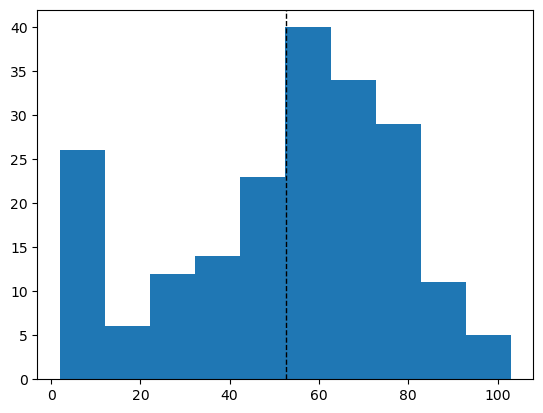

In [14]:
import matplotlib.pyplot as plt

plt.hist(X1)

plt.axvline(expectation, color='k', linestyle='dashed', linewidth=1)

# Is the sample expectation a good statistic to describe the distribution of x1 for this model?